# Spam classification
Strategies:
- Baseline: TFIDF + Cosine similarity KNN
- Text preprocessing: 
    - Remove + non-remove stopwords
    - Stemming
- Metrics:
    - Accuracy, Precision, Recall, F1-score

# Import libraries

In [137]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt

# Data Preprocessing

Load data as a list of pairs of sentences and labels (0 for non-spam, 1 for spam)

In [14]:
# Load data as a list of pairs of sentences and labels (0 for non-spam, 1 for spam)
data = []
with open('SMSSpamCollection') as f:
    for line in f:
        firstword = (line.split()[0])
        label = None
        if firstword == 'ham':
            label = 0
        else: 
            label = 1
        text = line.replace(firstword,'').strip()
        data.append([text,label])
# transform data to numpy array
data = np.array(data)

In [19]:
X = TfidfVectorizer().fit_transform(data[:,0])
Y = data[:,1]

<BarContainer object of 2 artists>

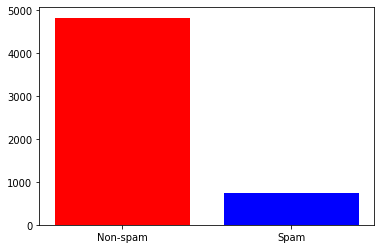

In [58]:
count_pos_neg = []
for key,value in Counter(Y).items():
    count_pos_neg.append([key,value])
count_pos_neg = np.array(count_pos_neg).astype('uint16')
plt.bar(['Non-spam','Spam'],count_pos_neg[:,1],color=['r','b'])


The data is skewed, non-spam data is dominant
Things to consider:
    - New evaluation metrics, not accuracy, but F1 Score

In [44]:
count_pos_neg[:,1]

array(['4827', '747'], dtype='<U4')

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=574)

In [101]:
model = KNeighborsClassifier(n_neighbors=16)

In [122]:
model.fit(X_train,Y_train)
Y_test_pred = model.predict(X_test)
fscore = f1_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
print('Fscore=',fscore)

Fscore= 0.8382352941176471


# Hyperparameter tuning

In [143]:
max_fscore = 0
best_neighbor = 0
print("Finding best \"neighbor\" hyperparam..")
for neighbor in range(1,30):
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    fscore = f1_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
    if max_fscore < fscore:
        max_fscore = fscore
        best_neighbor = neighbor
        accu = accuracy_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
print('Best neighbor=',best_neighbor)
print('Best fscore=',max_fscore)
print('Accuracy=',accu)

Finding best "neighbor" hyperparam..
Best neighbor= 21
Best fscore= 0.8951048951048951
Accuracy= 0.9738675958188153


In [142]:
max_fscore = 0
best_neighbor = 0
print("Finding best \"neighbor\" hyperparam..")
for neighbor in range(1,30):
    model = KNeighborsClassifier(n_neighbors=neighbor,metric='minkowski')
    model.fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    fscore = f1_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
    if max_fscore < fscore:
        max_fscore = fscore
        best_neighbor = neighbor
        accu = accuracy_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))

print('Best neighbor=',best_neighbor)
print('Best fscore=',max_fscore)
print('Accuracy=',accu)

Finding best "neighbor" hyperparam..
Best neighbor= 21
Best fscore= 0.8951048951048951
Accuracy= 0.9738675958188153


In [141]:
max_fscore = 0
best_neighbor = 0
print("Finding best \"neighbor\" hyperparam..")
for neighbor in range(1,30):
    model = KNeighborsClassifier(n_neighbors=neighbor,metric='cosine')
    model.fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    fscore = f1_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
    if max_fscore < fscore:
        max_fscore = fscore
        best_neighbor = neighbor
        accu = accuracy_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))

        
print('Best neighbor=',best_neighbor)
print('Best fscore=',max_fscore)
print('Accuracy=',accu)


Finding best "neighbor" hyperparam..
Best neighbor= 1
Best fscore= 0.9395973154362416
Accuracy= 0.9843205574912892


In [144]:
max_fscore = 0
best_neighbor = 0
print("Finding best \"neighbor\" hyperparam..")
for neighbor in range(1,30):
    model = KNeighborsClassifier(n_neighbors=neighbor,metric='l2')
    model.fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    fscore = f1_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))
    if max_fscore < fscore:
        max_fscore = fscore
        best_neighbor = neighbor
        accu = accuracy_score(Y_test_pred.astype('uint8'),Y_test.astype('uint8'))

print('Best neighbor=',best_neighbor)
print('Best fscore=',max_fscore)
print('Accuracy=',accu)


Finding best "neighbor" hyperparam..
Best neighbor= 21
Best fscore= 0.8951048951048951
Accuracy= 0.9738675958188153


| Architecture      | Hyperparam   | Distance metric | F1-score | Accuracy |
|-------------------|--------------|-----------------|----------|----------|
| Nearest Neighbors | neighbors=21 | Minkowski       | 89,51    | 97,39    |
| Nearest Neighbors | neighbors=21 | L2              | 89,51    | 97,39    |
| Nearest Neighbors | neighbors=1  | Cosine          | **93,96**    | **98,43**    |